# Orders - Multivariate Regression of  the `review_score`

In [56]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
# Import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Utilizar de dataset el resultado de la clase pasada (con la distancia)



In [59]:
orders = pd.read_csv('/content/drive/MyDrive/olist/tablon_primario23.cvs')
orders


,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,tiempo_de_espera,real_vs_esperado,es_cinco_estrellas,es_una_estrella,review_score_original,number_of_products,vendedores_unicos,precio,transporte,distance_seller_customer
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.436574,0.0,0,0,4,1,1,29.99,8.72,18.063837
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.782037,0.0,0,0,4,1,1,118.70,22.76,856.292580
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.394213,0.0,1,0,5,1,1,159.90,19.22,514.130333
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.208750,0.0,1,0,5,1,1,45.00,27.20,1822.800366
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.873877,0.0,1,0,5,1,1,19.90,8.72,30.174037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95875,95875,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,8.218009,0.0,1,0,5,1,1,72.00,13.08,69.481037
95876,95876,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.193727,0.0,0,0,4,1,1,174.90,20.10,474.098245
95877,95877,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,24.859421,0.0,1,0,5,1,1,205.99,65.02,968.051192
95878,95878,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.086424,0.0,0,0,2,2,1,359.98,81.18,370.146853


In [60]:
orders.isnull().sum()

Unnamed: 0                        0
order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
tiempo_de_espera                  8
real_vs_esperado                  8
es_cinco_estrellas                0
es_una_estrella                   0
review_score_original             0
number_of_products                0
vendedores_unicos                 0
precio                            0
transporte                        0
distance_seller_customer          0
dtype: int64

Let's recall our simple analysis from yesterday's exercise:

¿ Aqué esta correlacionada `review_score`?
 * Si dos variables tmb tienen correlación entre sí deberíamos analizarla por separado
  *  Probar con `statsmodels`: `tiempo_de_espera` y `real_vs_esperado`

En el diagrama vemos claramente que la variable `review_score_original`, que representa la calificación de las reseñas, muestra correlaciones significativas con otras variables. Es altamente positiva (0.79) con la etiqueta `es_cinco_estrellas`, indicando que calificaciones más altas tienden a recibir cinco estrellas. Sin embargo, presenta correlaciones negativas con las etiquetas `es_una_estrella`, la diferencia entre las fechas reales y esperadas de entrega (`real_vs_esperado`), y el tiempo de espera (`tiempo_de_espera`) con valores de -0.81, -0.27 y -0.33, respectivamente. Esto sugiere que calificaciones más bajas están asociadas con una sola estrella, entregas fuera del tiempo esperado y tiempos de espera más largos. Estas correlaciones ofrecen información valiosa sobre los factores que influyen en las calificaciones de las reseñas.

<ipython-input-61-3fb436dbd0af>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  orders.corr(),


<Axes: >

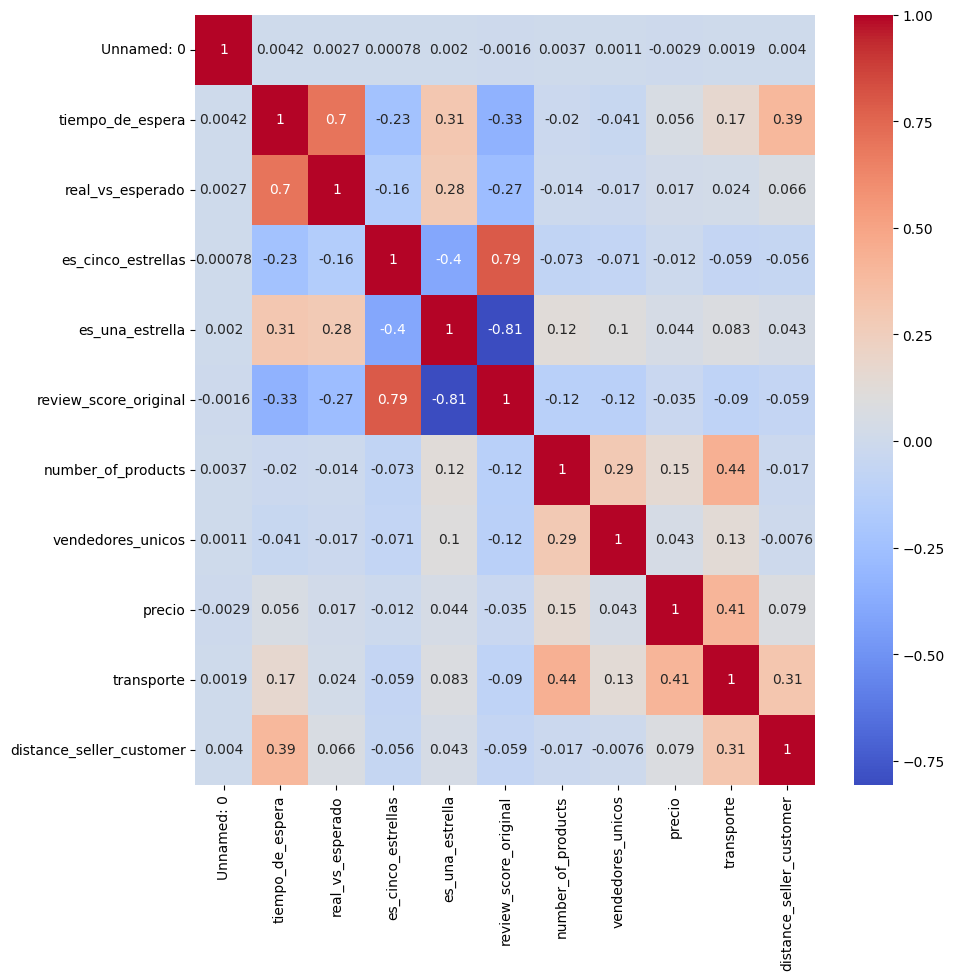

In [61]:
plt.figure(figsize = (10, 10))

sns.heatmap(
    orders.corr(),
    cmap = 'coolwarm',
    annot = True,
    annot_kws = {"size": 10}
)

In [62]:
matriz_correlacion = orders.corr()

# convierto la matriz de correlación a un DataFrame
tabla_correlacion = pd.DataFrame(matriz_correlacion.unstack().sort_values(ascending=False),
                                  columns=['Correlación'])

# saco duplicados y diagonal
tabla_correlacion = tabla_correlacion[tabla_correlacion.index.get_level_values(0) != tabla_correlacion.index.get_level_values(1)]

tabla_correlacion

<ipython-input-62-5d3f3f37b43b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = orders.corr()


,,Correlación
es_cinco_estrellas,review_score_original,0.789811
review_score_original,es_cinco_estrellas,0.789811
real_vs_esperado,tiempo_de_espera,0.702597
tiempo_de_espera,real_vs_esperado,0.702597
number_of_products,transporte,0.438059
...,...,...
tiempo_de_espera,review_score_original,-0.334036
es_una_estrella,es_cinco_estrellas,-0.396947
es_cinco_estrellas,es_una_estrella,-0.396947
es_una_estrella,review_score_original,-0.805527


## 1 - Regresión Univariada

Usar [statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html) con `statsmodels.formula.api`
 - `model1`: una regresión ols de `review_score` sobre `tiempo_de_espera`
 - `model2`: una regresión ols de `review_score` sobre `real_vs_esperado`

Para cada uno, imprima la tabla `summary` e interprete los resultados:
- Entender cómo estos resultados coinciden con los del diagrama de seaborn
- Interpretar `R-squared`, así como `coeficientes de regresión individuales`, `valores t`, `valores p` e `intervalos de confianza del 95 %`

***Modelo 1***:

In [63]:

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

model_formula = 'review_score_original ~ tiempo_de_espera'
model = smf.ols(formula=model_formula, data=orders).fit()

print(model.summary())


                              OLS Regression Results                             
Dep. Variable:     review_score_original   R-squared:                       0.112
Model:                               OLS   Adj. R-squared:                  0.112
Method:                    Least Squares   F-statistic:                 1.204e+04
Date:                   Wed, 01 Nov 2023   Prob (F-statistic):               0.00
Time:                           00:49:41   Log-Likelihood:            -1.5441e+05
No. Observations:                  95872   AIC:                         3.088e+05
Df Residuals:                      95870   BIC:                         3.089e+05
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept 

La correlación entre review_score_original y tiempo_de_espera es -0.33, lo que indica una relación negativa moderada entre estas dos variables. Esto sugiere que a medida que el tiempo de espera aumenta, el puntaje de la revisión tiende a disminuir, y viceversa.

R-squared: R-squared es una medida de tan bien el modelo de regresión se ajusta a los datos. En este caso, R-squared es 0.112, lo que significa que aproximadamente el **11.2% de la variabilidad en review_score_original puede ser explicada por el tiempo de espera**. Esto indica que el modelo no explica una gran parte de la variabilidad en los datos, lo que sugiere que otros factores también pueden estar influyendo en el puntaje de revisión.

El intercepto del modelo es 4.7236. Esto significa que, si el tiempo de espera es cero, se espera un puntaje de reseña de aproximadamente 4.7236

Coeficiente de Tiempo de Espera: El coeficiente de -0.0454 significa que **por cada unidad de aumento en el tiempo de espera, el puntaje de revisión disminuye en promedio alrededor de 0.0454 unidades.**

El **valor t (-109.730)** indica cuántas desviaciones estándar está el coeficiente de tiempo de espera lejos de cero.Cuanto mayor sea la magnitud de T, mayor será la evidencia en contra de la hipótesis nula. En este caso, es **muy grande, lo que indica que el coeficiente es significativamente diferente de cero. Sugiere que el efecto del tiempo de espera en el puntaje de revisión es altamente significativo.**
El valor p (0.000) es la probabilidad de observar un valor t tan extremo como este si el coeficiente fuera realmente cero. Esto significa que hay una probabilidad prácticamente nula de observar un valor de t tan extremo como -109.730 si el verdadero efecto del tiempo de espera fuera cero. Dado que el valor p es tan bajo, podemos concluir que **el efecto del tiempo de espera en el puntaje de revisión es altamente significativo y no es el resultado del azar.**

Intervalo de Confianza del 95%: El intervalo de confianza del 95% para el coeficiente ** de tiempo de espera está entre -0.046 y -0.045,** lo que significa que podemos estar 95% seguros de que el verdadero efecto del tiempo de espera en la calificación está contenido en este rango.

***Modelo 2***:

In [64]:
orders['real_vs_esperado'] = orders['real_vs_esperado'].fillna(0)

#en el ejemplo brindado se cambian los valores nan de real_vs_esperado por 0, asi que realizo lo mismo para que coincidan los valores

In [65]:
orders.isna().sum()

Unnamed: 0                        0
order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
tiempo_de_espera                  8
real_vs_esperado                  0
es_cinco_estrellas                0
es_una_estrella                   0
review_score_original             0
number_of_products                0
vendedores_unicos                 0
precio                            0
transporte                        0
distance_seller_customer          0
dtype: int64

In [66]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

model_formula = 'review_score_original ~ real_vs_esperado'
model = smf.ols(formula=model_formula, data=orders).fit()

print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     review_score_original   R-squared:                       0.074
Model:                               OLS   Adj. R-squared:                  0.074
Method:                    Least Squares   F-statistic:                     7682.
Date:                   Wed, 01 Nov 2023   Prob (F-statistic):               0.00
Time:                           00:49:42   Log-Likelihood:            -1.5640e+05
No. Observations:                  95880   AIC:                         3.128e+05
Df Residuals:                      95878   BIC:                         3.128e+05
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept 

In [67]:
orders.isnull().sum()

Unnamed: 0                        0
order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
tiempo_de_espera                  8
real_vs_esperado                  0
es_cinco_estrellas                0
es_una_estrella                   0
review_score_original             0
number_of_products                0
vendedores_unicos                 0
precio                            0
transporte                        0
distance_seller_customer          0
dtype: int64

R-squared es 0.074, lo que significa que aproximadamente el 7.4% de la variabilidad en review_score_original puede ser explicada por la variable real_vs_esperado. Este valor indica que el modelo no explica una gran parte de la variabilidad en los datos, lo que sugiere que otros factores no incluidos en el modelo también pueden estar afectando el puntaje de revisión.

El diagrama de seaborn coincide ya que muestra una correlacion moderada entre las variables. Entre real_vs_esperado y review_score_original (-0.2723) indica una correlación negativa moderada entre estas dos variables. Esto implica que cuando real_vs_esperado aumenta, review_score_original tiende a disminuir, y viceversa.

El coeficiente para Intercept es 4.2122, lo que sugiere que cuando real_vs_esperado es 0, el puntaje de revisión esperado es 4.2122.
El coeficiente para real_vs_esperado es -0.0752. Esto significa que por cada unidad de aumento en real_vs_esperado, el puntaje de revisión disminuye en promedio alrededor de 0.0752 unidades.

Para Intercept, el valor t es extremadamente alto (1041.234) y el valor p es prácticamente cero, lo que indica que el término constante (Intercept) es altamente significativo.

Para real_vs_esperado, el valor t es -87.644 y el valor p es prácticamente cero, lo que indica que real_vs_esperado también es altamente significativo en la predicción del puntaje de revisión.

En resumen, el modelo muestra una relación significativa y negativa entre real_vs_esperado y review_score_original. A medida que real_vs_esperado aumenta (suponiendo que otras variables se mantienen constantes), el puntaje de revisión tiende a disminuir. Sin embargo, dado el bajo R-squared, se debe tener en cuenta que este modelo explica solo una pequeña parte de la variabilidad en los puntajes de revisión, lo que sugiere que otros factores también contribuyen significativamente a los puntajes de revisión.

## 2 - Multivariate regression

***responder***
¿Cual es el impacto en `review_score` agregando un día más de `real_vs_esperado` manteniendo todo lo otro constante? ¿Cuál es más explicativa de `review_score`,`tiempo_de_espera` o `real_vs_esperado` ?



**Analizando los dos modelos por separado**:

El coeficiente asociado a real_vs_esperado es -0.0752. Esto indica que por cada unidad de aumento en real_vs_esperado(dia de aumento, manteniendo el resto constante), se espera una disminución de aproximadamente -0.0752 en el puntaje de reseña.

El coeficiente asociado a tiempo_de_espera es -0.0454. El coeficiente asociado a real_vs_esperado es -0.0752.**En términos de magnitud, el coeficiente para real_vs_esperado es mayor en valor absoluto que el coeficiente para tiempo_de_espera.** Esto indica que, en promedio, un cambio unitario en real_vs_esperado tiene un impacto mayor en el puntaje de revisión en comparación con un cambio unitario en tiempo_de_espera. Los dos coeficientes tienen un valor p prácticamente cero (lo que indica alta significancia estadística). Ambas variables son estadísticamente significativas y tienen un impacto significativo en review_score_original.

Para tiempo_de_espera, por cada unidad adicional de tiempo de espera, el puntaje de revisión disminuye en promedio 0.0454 unidades.
Para real_vs_esperado, por cada unidad adicional de real_vs_esperado, el puntaje de revisión disminuye en promedio 0.0752 unidades.

Aunque ambos coeficientes son estadísticamente significativos, real_vs_esperado tiene un impacto práctico mayor en review_score_original en comparación con tiempo_de_espera, ya que un cambio unitario en real_vs_esperado resulta en una disminución mayor en el puntaje de revisión en comparación con un cambio unitario en tiempo_de_espera. Por lo tanto, basándonos en la magnitud de los coeficientes y su impacto práctico, real_vs_esperado parece ser una variable más explicativa en relación con review_score_original en comparación con tiempo_de_espera

**Analizando un modelo que incluye ambas variables: Regresión multivariada**

***Modelo 3***:

In [68]:
orders.isnull().sum()


Unnamed: 0                        0
order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
tiempo_de_espera                  8
real_vs_esperado                  0
es_cinco_estrellas                0
es_una_estrella                   0
review_score_original             0
number_of_products                0
vendedores_unicos                 0
precio                            0
transporte                        0
distance_seller_customer          0
dtype: int64

In [71]:
import pandas as pd
import statsmodels.api as sm

#orders = orders.dropna()
orders['real_vs_esperado'] = orders['real_vs_esperado'].fillna(0)
orders = orders.dropna(subset=['tiempo_de_espera']) #para que coincida con modelo otorgado

X = orders[['tiempo_de_espera', 'real_vs_esperado']]
y = orders['review_score_original']


X = sm.add_constant(X)


model = sm.OLS(y, X).fit()


print(model.summary())


                              OLS Regression Results                             
Dep. Variable:     review_score_original   R-squared:                       0.114
Model:                               OLS   Adj. R-squared:                  0.114
Method:                    Least Squares   F-statistic:                     6191.
Date:                   Wed, 01 Nov 2023   Prob (F-statistic):               0.00
Time:                           00:50:34   Log-Likelihood:            -1.5426e+05
No. Observations:                  95872   AIC:                         3.085e+05
Df Residuals:                      95869   BIC:                         3.086e+05
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const     

Nuestra regresión multivariante nos permite aislar el impacto de una característica, mientras controlamos el efecto de otras características. Estos nuevos coeficientes se denominan **`coeficientes de correlación parcial`**.

Los resultados de la regresión indican que, manteniendo constante el valor de tiempo_de_espera, por cada día adicional de real_vs_esperado, el review_score_original disminuye en promedio alrededor de 0.0205 unidades. Es decir, un aumento en la discrepancia entre el tiempo de entrega esperado y el tiempo de entrega real está asociado con una disminución en el puntaje de revisión, manteniendo constante el tiempo de espera.

En cuanto a cuál variable es más explicativa de review_score_original,  comparo los coeficientes de ambas variables (tiempo_de_espera y real_vs_esperado) para determinar su impacto relativo. En este caso, el coeficiente asociado a tiempo_de_espera es -0.0383, mientras que el coeficiente asociado a real_vs_esperado es -0.0205. Esto sugiere que el tiempo de espera tiene un impacto más significativo en el review_score_original en comparación con la discrepancia entre el tiempo de entrega esperado y el tiempo de entrega real.

En resumen, según estos resultados:

Impacto de real_vs_esperado en review_score_original: Por cada día adicional de discrepancia entre el tiempo de entrega esperado y el tiempo de entrega real (real_vs_esperado), el review_score_original disminuye en promedio alrededor de 0.0205 unidades, manteniendo constante el tiempo de espera.

Comparación entre tiempo_de_espera y real_vs_esperado: El coeficiente asociado a tiempo_de_espera es más grande en valor absoluto (-0.0383), lo que sugiere que el tiempo de espera tiene un impacto más significativo en el review_score_original en comparación con la discrepancia entre el tiempo de entrega esperado y el tiempo de entrega real.

 R-squared es bastante bajo: no más del 12 % de las variaciones de review_score se explican por las variaciones combinadas de `tiempo_de_espera` y `real_vs_esperado`.

Intentemos agregar más variables a nuestra regresión para mejorar la explicabilidad de la regresión lineal.

Crear un nuevo OLS `model4` con más características del conjunto de datos `orders`.
- No agregar dos características perfectamente colineales entre sí
-  Transformar cada variables $X_i$ con el respectivo z-score $Z_i = \frac{X_i - \mu_i}{\sigma_i}$  para comparar los coeficientes de regresión parcial $\beta_i$ en conjuntos.  $\beta_i$ no estará en la misma dimensión.

***Modelo 4***:

¿Que variables considerar?

In [ ]:
orders.columns

Index(['Unnamed: 0', 'order_id', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'tiempo_de_espera', 'real_vs_esperado',
       'es_cinco_estrellas', 'es_una_estrella', 'review_score_original',
       'number_of_products', 'vendedores_unicos', 'precio', 'transporte',
       'distance_seller_customer', 'tiempo_de_espera_zscore',
       'real_vs_esperado_zscore', 'number_of_products_zscore', 'precio_zscore',
       'distance_seller_customer_zscore', 'vendedores_unicos_zscore',
       'transporte_zscore'],
      dtype='object')

Crea el modelo 4

In [72]:
orders = pd.read_csv('/content/drive/MyDrive/olist/tablon_primario.cvs')
orders['order_approved_at'].fillna(method='ffill', inplace=True)
orders['order_delivered_carrier_date'].fillna(method='ffill', inplace=True)
orders['order_delivered_customer_date'].fillna(method='ffill', inplace=True)
orders['tiempo_de_espera'] = orders['tiempo_de_espera'].fillna(0)
orders['real_vs_esperado'] = orders['real_vs_esperado'].fillna(0)

In [73]:
orders.isna().sum()

Unnamed: 0                       0
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
tiempo_de_espera                 0
real_vs_esperado                 0
es_cinco_estrellas               0
es_una_estrella                  0
review_score_original            0
number_of_products               0
vendedores_unicos                0
precio                           0
transporte                       0
distance_seller_customer         0
dtype: int64

In [75]:
#select features
#features =
import pandas as pd
import statsmodels.api as sm
#variables que voy a considerar
features = ['number_of_products', 'precio', 'distance_seller_customer', "vendedores_unicos", "transporte"]
orders['tiempo_de_espera_zscore'] = (orders['tiempo_de_espera'] - orders['tiempo_de_espera'].mean()) / orders['tiempo_de_espera'].std()
orders['real_vs_esperado_zscore'] = (orders['real_vs_esperado'] - orders['real_vs_esperado'].mean()) / orders['real_vs_esperado'].std()

# Calcula el Z-score para las características seleccionadas
for feature in features:
    orders[feature + '_zscore'] = (orders[feature] - orders[feature].mean()) / orders[feature].std()

# Construye el modelo de regresión lineal con las características transformadas
X = orders[['tiempo_de_espera_zscore', 'real_vs_esperado_zscore'] + [feature + '_zscore' for feature in features]]
X = sm.add_constant(X)  # Agrega constante para el intercepto
y = orders['review_score_original']

# entrena
model4 = sm.OLS(y, X).fit()


print(model4.summary())


                              OLS Regression Results                             
Dep. Variable:     review_score_original   R-squared:                       0.145
Model:                               OLS   Adj. R-squared:                  0.144
Method:                    Least Squares   F-statistic:                     2314.
Date:                   Wed, 01 Nov 2023   Prob (F-statistic):               0.00
Time:                           00:54:31   Log-Likelihood:            -1.5261e+05
No. Observations:                  95880   AIC:                         3.052e+05
Df Residuals:                      95872   BIC:                         3.053e+05
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [76]:
orders

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,tiempo_de_espera,...,precio,transporte,distance_seller_customer,tiempo_de_espera_zscore,real_vs_esperado_zscore,number_of_products_zscore,precio_zscore,distance_seller_customer_zscore,vendedores_unicos_zscore,transporte_zscore
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.436574,...,29.99,8.72,18.063837,-0.431069,-0.153328,-0.264583,-0.513828,-0.979449,-0.11254,-0.652036
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.782037,...,118.70,22.76,856.292580,0.134280,-0.153328,-0.264583,-0.086651,0.429798,-0.11254,0.000493
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.394213,...,159.90,19.22,514.130333,-0.329786,-0.153328,-0.264583,0.111745,-0.145452,-0.11254,-0.164034
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.208750,...,45.00,27.20,1822.800366,0.073648,-0.153328,-0.264583,-0.441549,2.054711,-0.11254,0.206848
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.873877,...,19.90,8.72,30.174037,-1.019392,-0.153328,-0.264583,-0.562416,-0.959089,-0.11254,-0.652036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95875,95875,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,8.218009,...,72.00,13.08,69.481037,-0.454184,-0.153328,-0.264583,-0.311532,-0.893005,-0.11254,-0.449399
95876,95876,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.193727,...,174.90,20.10,474.098245,1.023920,-0.153328,-0.264583,0.183976,-0.212755,-0.11254,-0.123135
95877,95877,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,24.859421,...,205.99,65.02,968.051192,1.305850,-0.153328,-0.264583,0.333688,0.617689,-0.11254,1.964585
95878,95878,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.086424,...,359.98,81.18,370.146853,0.483760,-0.153328,1.601690,1.075217,-0.387520,-0.11254,2.715644


estandarize en nuevas columnas, no quería pisar originales

In [77]:
orders.columns

Index(['Unnamed: 0', 'order_id', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'tiempo_de_espera', 'real_vs_esperado',
       'es_cinco_estrellas', 'es_una_estrella', 'review_score_original',
       'number_of_products', 'vendedores_unicos', 'precio', 'transporte',
       'distance_seller_customer', 'tiempo_de_espera_zscore',
       'real_vs_esperado_zscore', 'number_of_products_zscore', 'precio_zscore',
       'distance_seller_customer_zscore', 'vendedores_unicos_zscore',
       'transporte_zscore'],
      dtype='object')

---
- ¿Cuáles son las características más importantes? (hacer un gráfico de barras para visualizarlos bien)
- ¿Cómo ha cambiado el rendimiento general de la regresión?
- ¿Es esta regresión estadísticamente significativa?

Para determinar las características más importantes considero los coeficientes beta estandarizados del modelo. Estos indican el cambio en la variable de respuesta (review_score_original) por cada desviación estándar en la variable predictora.

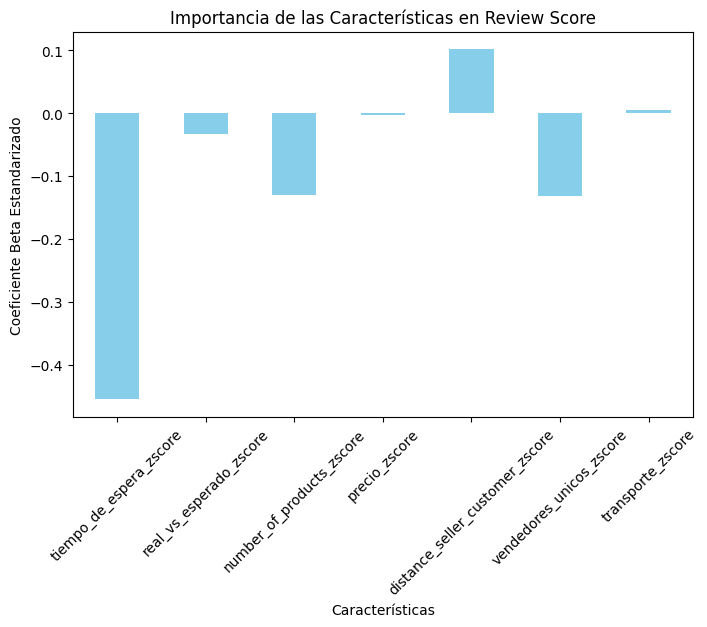

In [78]:
coeficientes_estandarizados = model4.params[1:]

plt.figure(figsize=(8, 5))
coeficientes_estandarizados.plot(kind='bar', color='skyblue')
plt.title('Importancia de las Características en Review Score')
plt.xlabel('Características')
plt.ylabel('Coeficiente Beta Estandarizado')
plt.xticks(rotation=45)
plt.show()

In [79]:
coeficientes_estandarizados = model4.params[1:]
nombres_variables = coeficientes_estandarizados.index.tolist()
df_coeficientes = pd.DataFrame({'Variable': nombres_variables, 'Coeficiente Estandarizado': coeficientes_estandarizados.values})
df_coeficientes


,Variable,Coeficiente Estandarizado
0,tiempo_de_espera_zscore,-0.454599
1,real_vs_esperado_zscore,-0.033455
2,number_of_products_zscore,-0.129945
3,precio_zscore,-0.003067
4,distance_seller_customer_zscore,0.101093
5,vendedores_unicos_zscore,-0.131691
6,transporte_zscore,0.005184


Las características más importantes son aquellas con coeficientes absolutos más grandes en valor absoluto. En este caso, las variables más importantes son tiempo_de_espera_zscore, distance_seller_customer_zscore, number_of_products_zscore y vendedores_unicos_zscore porque tienen los coeficientes absolutos más grandes en valor absoluto.

El rendimiento general de la regresión ha mejorado en comparación con la regresión anterior que incluía solo tiempo_de_espera y real_vs_esperado. El R-cuadrado ha aumentado del 11.4% al 14.5%, lo que indica que aproximadamente el 14.5% de las variaciones en review_score_original se explican por las variaciones en las variables incluidas en este modelo.

Para determinar la significancia estadística, observo que los valores p asociados a cada coeficiente. En este caso, casi todos los coeficientes tienen valores p cercanos a cero (0.000), lo que indica que la mayoria de las variables son estadísticamente significativas en la predicción de review_score_original. Las excepciones son precio y transporte

El modelo aún explica solo una fracción pequeña de la variación en el puntaje de revisión, lo que sugiere que hay otros factores o variables que podrían estar influyendo en el puntaje de revisión y que no se han incluido en este modelo.






- ¿Cual es la variable que más impacto tiene?
- qué pasa con productos y vendedores cuando hay más?
- Que pasa con la distancia?
- Que pasa con precio y transporte?
    
- Qué pasa con F-statistics y p-value?

- Analizar R cuadrado

Un R cuadrado bajo es común cuando el número de observaciones (n) es mucho mayor que el número de características (p). Todavía se pueden derivar ideas relevantes de tales regresiones, siempre que sean estadísticamente significativas.





 La variable "tiempo_de_espera_zscore" es la que tiene el mayor impacto en el puntaje del producto. Esto se determina por el valor absoluto del coeficiente estandarizado más grande. En este caso, el coeficiente estandarizado para "tiempo_de_espera_zscore" es -0.4546, lo que indica que una disminución de una desviación estándar en el tiempo de espera está asociada con una disminución de aproximadamente 0.4546 desviaciones estándar en el puntaje de revisión.

Según los resultados del modelo de regresión lineal, la variable "number_of_products_zscore" tiene un coeficiente de -0.129 Esto significa que, manteniendo todas las demás variables constantes, un aumento en la cantidad de productos en el pedido (en desviaciones estándar) está asociado con una disminución de aproximadamente 0.129 en la calificacion del producto. Lo mismo se aplica a la variable "vendedores_unicos_zscore", que tiene un coeficiente de -0.131. Un aumento en la cantidad de vendedores únicos involucrados en el pedido (en desviaciones estándar) está asociado con una disminución de aproximadamente 0.131 en la calificacion, manteniendo todas las demás variables constantes.

Estos coeficientes negativos indican que, en promedio, un mayor número de productos en el pedido y un mayor número de vendedores únicos están asociados con puntajes de revisión más bajos. Esto podría sugerir que los clientes podrían enfrentar desafíos o complicaciones cuando hay más productos y vendedores involucrados, lo que podría afectar negativamente su satisfacción y, por ende, su calificación.

Hipotéticamente, esto podría ser debido a problemas logísticos, una experiencia de compra más compleja o dificultades en la coordinación entre múltiples productos y vendedores. Es importante que las empresas gestionen adecuadamente estos aspectos para mejorar la experiencia del cliente y, por ende, obtener revisiones más positivas.

La variable "distance_seller_customer_zscore" tiene un coeficiente de 0.1011. Esto significa que, manteniendo todas las demás variables constantes, un aumento en la distancia entre el vendedor y el cliente (en desviaciones estándar) está asociado con un aumento de aproximadamente 0.1011 en el puntaje de revisión.

Este coeficiente positivo indica que, en promedio, a medida que la distancia entre el vendedor y el cliente aumenta (en términos de desviaciones estándar), los puntajes de revisión tienden a ser más altos. Esto podría interpretarse como que los clientes podrían ser más comprensivos o indulgentes con los tiempos de entrega y otros posibles inconvenientes cuando están comprando a vendedores que se encuentran a mayores distancias geográficas. (hipotéticamente- es especulativo, se debería hacer una investigación adicional para comprender completamente las razones detrás de esta relación.)



En el modelo de regresión lineal, las variables "precio_zscore" y "transporte_zscore" tienen coeficientes de -0.0031 y 0.0052 respectivamente.

Para la variable "precio_zscore" (precio), el coeficiente negativo indica que, manteniendo todas las demás variables constantes, un aumento en el precio (en desviaciones estándar) está asociado con una disminución de aproximadamente 0.0031 en el puntaje de revisión. Esto sugiere que a medida que aumenta el precio de los productos (en términos de desviaciones estándar), los puntajes de revisión tienden a ser ligeramente más bajos. Los clientes podrían estar menos satisfechos cuando los productos son más caros.

Para la variable "transporte_zscore" (transporte), el coeficiente positivo indica que, manteniendo todas las demás variables constantes, un aumento en el precio del transporte (en desviaciones estándar) está asociado con un aumento de aproximadamente 0.0052 en el puntaje de revisión. Esto sugiere que un mayor precio de transporte, medido en términos de desviaciones estándar, se relaciona con puntajes de revisión ligeramente más altos.

Es importante tener en cuenta que **estos efectos son relativamente pequeños en comparación con otras variables en el modelo, como "tiempo_de_espera_zscore" y "vendedores_unicos_zscore", que tienen coeficientes mucho más grandes.**Sin embargo, estos resultados indican que el precio y la calidad del transporte también pueden influir en los puntajes de revisión, aunque en menor medida.

En el modelo 4, el valor del estadístico F es 2314. Este valor indica la significancia global del modelo de regresión, es decir, mide si al menos una de las variables independientes tiene un efecto significativo en la variable dependiente (review_score_original). Un valor alto del estadístico F sugiere que al menos una de las variables independientes es significativamente diferente de cero en su efecto sobre la variable dependiente.

El valor del p-valor asociado al estadístico F es 0.00, lo que significa que el modelo es estadísticamente significativo en general. En otras palabras, al menos una de las variables independientes tiene un efecto significativo en los puntajes de revisión. Esto se refuerza con el valor bajo del p-valor, indicando que la probabilidad de obtener un estadístico F tan grande por pura casualidad es prácticamente cero.

En resumen, tanto el estadístico F grande como el bajo p-valor sugieren que el modelo en su conjunto es significativo y que al menos una de las variables independientes tiene un efecto significativo en los puntajes de revisión.

**El estadístico F ha disminuido de 6191 a 2314 en el modelo 4, indicando que el nuevo modelo con variables adicionales tiene menos capacidad predictiva conjunta en comparación con el modelo anterior. Sin embargo, la inclusión de las variables adicionales ha aumentado el R-cuadrado ajustado del 11.4% al 14.5%, lo que sugiere que estas nuevas variables están contribuyendo a explicar una mayor proporción de la variabilidad en los puntajes de revisión, a pesar de que el modelo en su conjunto tiene menos capacidad predictiva.**

(r cuadrado analizado arriba)

## 3 - Chequear la performance de modelos

¡El rendimiento de la regresión no debe medirse solo por su R-cuadrado!

Siempre visualice la distribución de las predicciones, y especialmente los residuales.

* Calcular los residuos.

Debería ver que la media de los residuos es igual a 0 (siempre verificado en un contexto de regresión lineal)

In [80]:
predicted_values = model4.predict(X)  # Asegúrate de que X incluye las variables transformadas como en el modelo
residuals = y - predicted_values
# Verificar la media de los residuos
mean_residuals = residuals.mean()
print("Media de los residuos:", mean_residuals)


Media de los residuos: 1.531268506514789e-14


Computar rmse

In [81]:
from sklearn.metrics import mean_squared_error
import math

# Calcula las predicciones del modelo
predicciones = model4.predict(X)  # Asegúrate de tener X correctamente definido con las variables transformadas

# Calcula el error cuadrático medio
mse = mean_squared_error(y, predicciones)

# Calcula la raíz del error cuadrático medio (RMSE)
rmse = math.sqrt(mse)

print("RMSE:", rmse)


RMSE: 1.1886138855078903


In [ ]:
##codear RMS (Buscar en wikipedia)

1.1883154116821097

Plotear los resultados

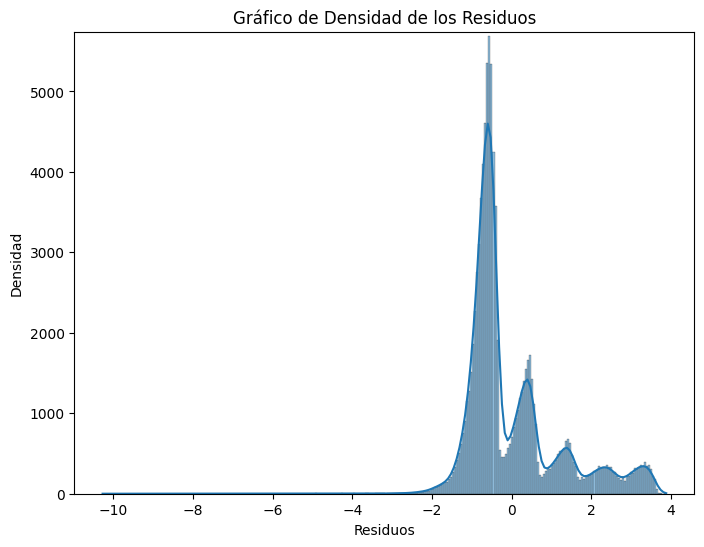

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

residuos = predicciones - y



plt.figure(figsize=(8, 6))
sns.histplot(residuos, kde=True)
sns.rugplot(residuos, height=-0.02, color='red')
plt.title('Gráfico de Densidad de los Residuos')
plt.xlabel('Residuos')
plt.ylabel('Densidad')
plt.show()




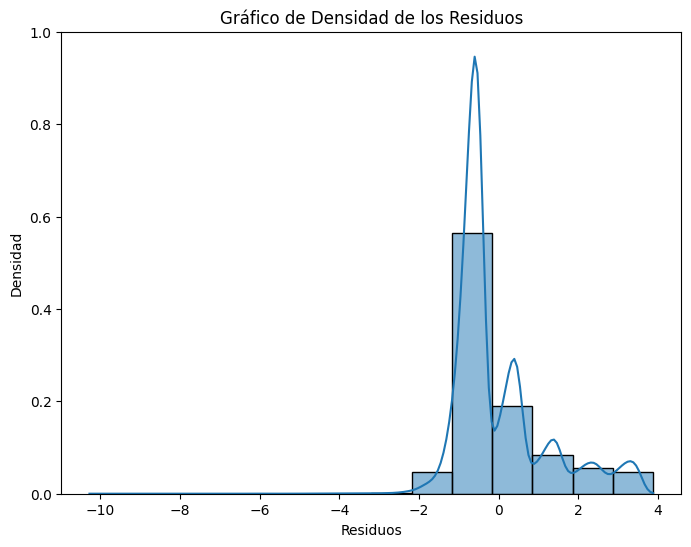

In [105]:
from colorsys import yiq_to_rgb
import seaborn as sns
import matplotlib.pyplot as plt


residuos = predicciones - y


plt.figure(figsize=(8, 6))
sns.histplot(residuos, kde=True, stat='density', bins=14)
sns.rugplot(residuos, height=-0.02, color='red')
plt.title('Gráfico de Densidad de los Residuos')
plt.xlabel('Residuos')
plt.ylabel('Densidad')
plt.ylim(0, 1.0)
plt.show()

Text(0.5, 1.0, 'residuals density plot')

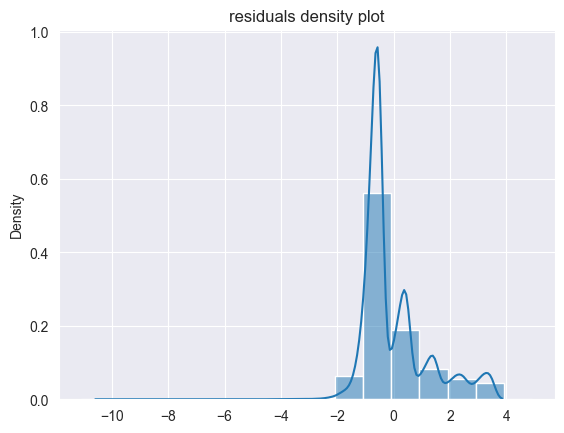

* ¿Por qué la trama residual tiene una forma tan extraña?

La trama residual tiene una forma tan extraña porque no es una distribución normal. La distribución normal es una forma de campana que se encuentra en muchas variables, como el peso, la altura y el coeficiente intelectual. En este caso, los residuos están más concentrados en los extremos de la distribución, lo que significa que hay más productos que se calificaron con 1 o 5 estrellas de lo que se esperaba.

Hay varias razones por las que esto podría estar sucediendo. Una posibilidad es que haya un sesgo en los datos. Por ejemplo, es posible que los consumidores que están más satisfechos con un producto sean más propensos a calificarlo con 5 estrellas, mientras que los consumidores que están menos satisfechos sean más propensos a calificarlo con 1 estrella.

Otra posibilidad es que el modelo no esté capturando todos los factores que influyen en la calificación de un producto. Por ejemplo, el modelo ignora la calidad o la reputación del articulo.

Para determinar la causa de la forma extraña de la trama residual, sería necesario realizar un análisis más detallado de los datos. Esto podría incluir examinar los datos para detectar sesgos o investigar otros factores que podrían estar influyendo en la calificación de los productos.

en resumen:

- Efectos de cola: Es posible que haya efectos de cola en los datos, lo que significa que hay más productos que se califican con 1 o 5 estrellas de lo que se esperaría en una distribución normal. Esto podría deberse a que los consumidores son más propensos a expresar sus opiniones extremas, tanto positivas como negativas.
- Ajuste del modelo: Es posible que el modelo no esté ajustado correctamente a los datos. Esto podría hacer que el modelo subestime o sobrestime la calificación esperada de algunos productos, lo que podría conducir a residuos extremos.
- Factores no controlados: Es posible que haya factores que influyen en la calificación de los productos que no están controlados por el modelo.





Plotea en el mismo gráfico tanto la distribución de `review_score` como la distribución de `predicted_review_score`.

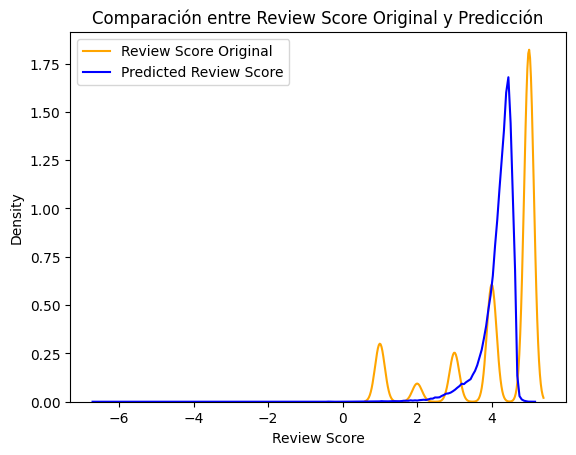

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

review_score_original = orders['review_score_original']
predicted_review_score = model4.predict(X)

sns.kdeplot(x=review_score_original, bw_adjust=1, label='Review Score Original', color='orange')

sns.kdeplot(x=predicted_review_score, bw_adjust=0.5, label='Predicted Review Score', color='blue')

plt.title('Comparación entre Review Score Original y Predicción')
plt.xlabel('Review Score')
plt.legend()
plt.show()



Tiene una forma extraña porque el modelo aprendio muy bien a predecir el score 4 pero no tanto los otros valores. Cuantos mas datos de un valor yo entrego, el modelo aprende mas del mismo.

Text(0.5, 1.0, 'distribution of predicted and actual values')

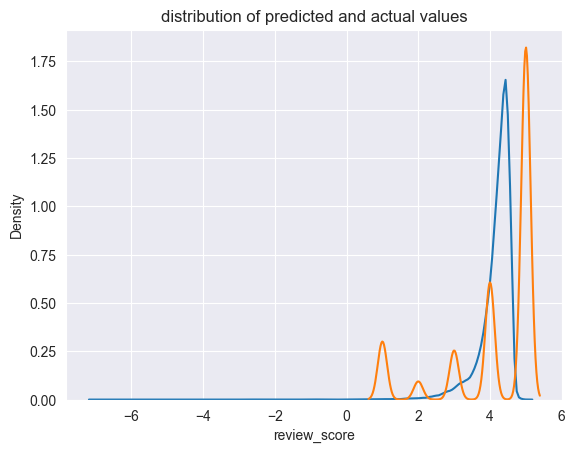

Usando `seaborn`, ya podríamos haber trazado una `línea de regresión` de `review_score` frente a `real_vs_esperado`

Hacelo con una sub-`muestra` de la población, y una vez con la `toda la población`.

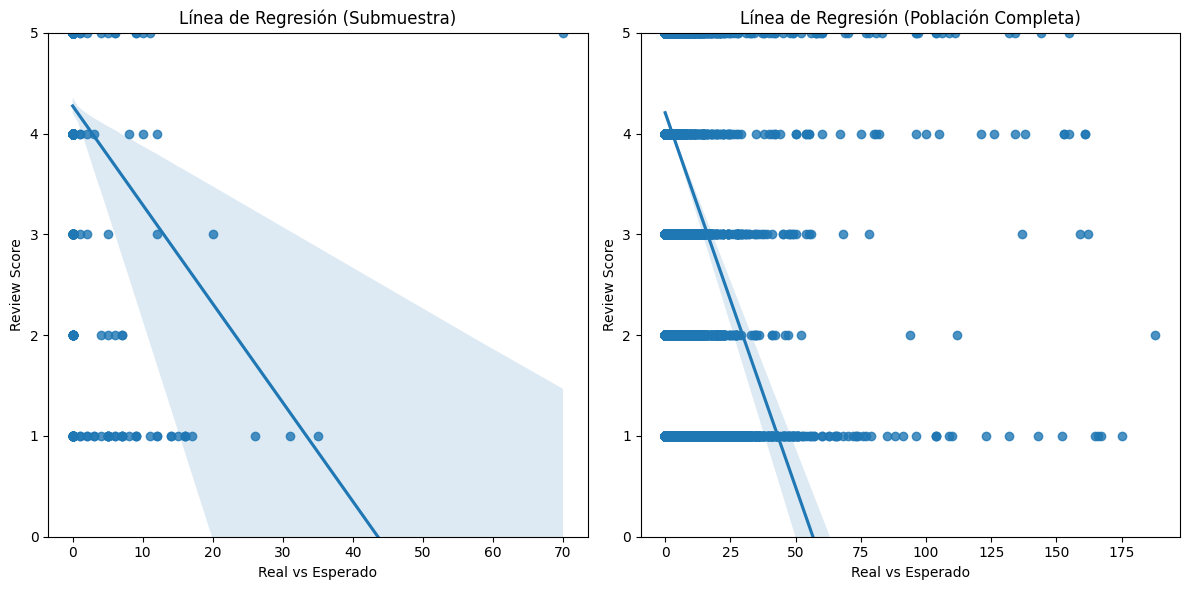

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creo subgráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Submuestra del DataFrame (por ejemplo, las primeras 1000 filas)
#pruebo pocas filas para ver diferencia entre muestra con muchas y desp pocas// abajo despues lo hago con muchas y veo como ahi si se hace parecido al de total de la poblacion
submuestra = orders.sample(n=1000, random_state=42)

# submuestra
sns.regplot(x='real_vs_esperado', y='review_score_original', data=submuestra, ax=axes[0])
axes[0].set_title('Línea de Regresión (Submuestra)')
axes[0].set_xlabel('Real vs Esperado')
axes[0].set_ylabel('Review Score')
axes[0].set_ylim(0, 5)  # Establecer el rango del eje y de 0 a 5

# poblacion
sns.regplot(x='real_vs_esperado', y='review_score_original', data=orders, ax=axes[1])
axes[1].set_title('Línea de Regresión (Población Completa)')
axes[1].set_xlabel('Real vs Esperado')
axes[1].set_ylabel('Review Score')
axes[1].set_ylim(0, 5)  # Establecer el rango del eje y de 0 a 5

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()

plt.show()



(0.0, 5.942038100814559)

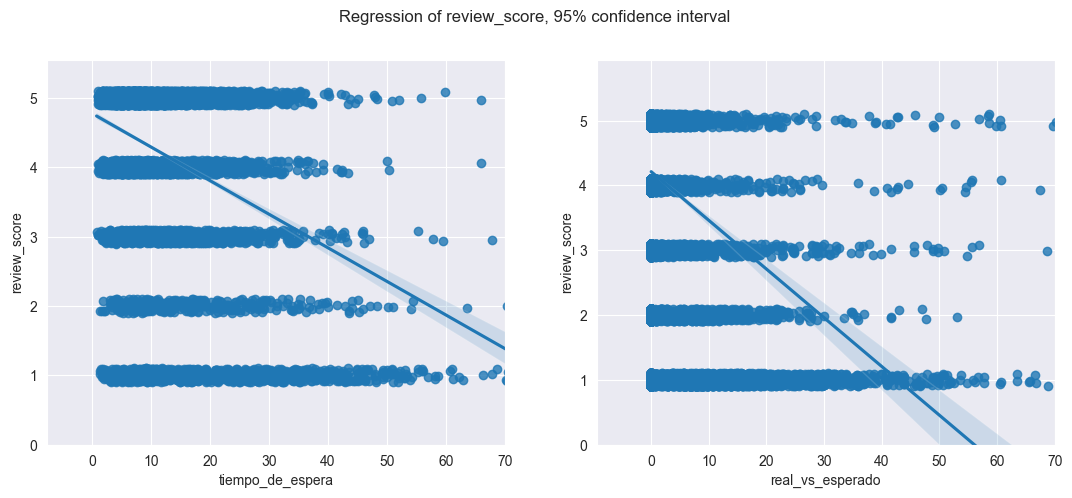

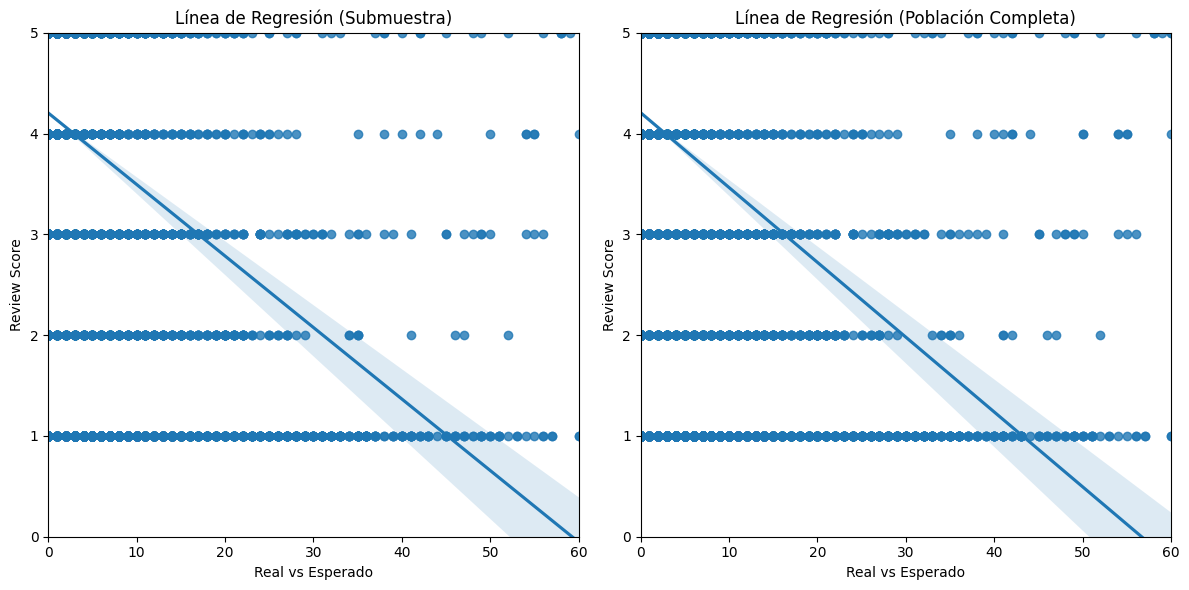

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

#tomo muestra mas grande
submuestra = orders.sample(n=80000, random_state=42)

# submuestra
sns.regplot(x='real_vs_esperado', y='review_score_original', data=submuestra, ax=axes[0])
axes[0].set_title('Línea de Regresión (Submuestra)')
axes[0].set_xlabel('Real vs Esperado')
axes[0].set_ylabel('Review Score')
axes[0].set_ylim(0, 5)  # Establecer el rango del eje y de 0 a 5
axes[0].set_xlim(0, 60)  # Establecer el rango del eje x de 0 a 60

#población
sns.regplot(x='real_vs_esperado', y='review_score_original', data=orders, ax=axes[1])
axes[1].set_title('Línea de Regresión (Población Completa)')
axes[1].set_xlabel('Real vs Esperado')
axes[1].set_ylabel('Review Score')
axes[1].set_ylim(0, 5)  # Establecer el rango del eje y de 0 a 5/ (para hacerlo mas parecido al ejemplo)
axes[1].set_xlim(0, 60)  # Establecer el rango del eje x de 0 a 60 / (para hacerlo mas parecido al ejemplo)


plt.tight_layout()

plt.show()
